## Data Preparation 02 (Webcam Scanner)

The Datascan II set was done with a webcam. The main idea is to use the same device for a training set, as will be used in the final step during capturing the dropping cards. We may profit from a similar lightning scene as was used during training.  

### Dataextraction for Datascan II (Webcam)

The next cell shows the step that was used for the scan.

> <u>NOTE 1</u>: Every 800 milliseconds the computer is saving the current card to the disk. The card itself is slightly moved and turned for a while. If enough scans are recorded, we push the space key to step to the next cardId. The current cardId is also displayed in the frame to give feedback to the operator which card should be shown under the webcam. After all cards are done you can exit with escape.  
After scanning you can easily do a visual check in the output directory and remove scan's which to not fulfill the requirements of a nice scan.

> <u>NOTE 2</u>: The next cell includes the function **js.analyzeScan(frame)** within the helper library [JassSummarizer.py](JassSummarizer.py) . This function is explained in more detail in the next paragraph.


In [1]:
import JassSummarizer as js
from IPython.core.display import display, HTML
import numpy as np
import pandas as pd
import shutil
import os
import cv2                                                              # computer vision python library see README.md dependencies

iCnt=pCnt=0                                                             # enumerator indexer for all cards
cap = cv2.VideoCapture(0)                                               # webcam capture method 0 primary cam, 1 secondary cam
_, frame = cap.read()                                                   # take frame
if frame is None:                                                       # could we read data from webcam
    print("could not find webcam. Probably there is none connected")    # if not display info message
else:
    while(1):                                                               # loop until esc key
        # Take each frame
        _, frame = cap.read()                                               # take frame
        frameOrg,mask,img_rect,res,crop_img,d = js.analyzeScan(frame)       # analyze image and receive diffrent result images including boundingbox dimension

        theCardText=js.jassCardName(js.JassCN2(pCnt).name)                  # current cardId text to inform operator about current cardIdentification
        cv2.putText(frame,theCardText, (40,40), cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,0))           # write text in image
        cv2.imwrite(f"C:/temp/JassSummarizer/{js.JassCN2(pCnt).name}_{iCnt:06d}.jpg", res)          # save scan to corresponding path (using tempory path for convieniemce)

        cv2.imshow('capture',res)                                           # show captured image
        cv2.imshow('frame',frame)                                           # show scan with informations
        cv2.imshow('mask',np.array(mask))                                   # show mask
        k = cv2.waitKey(800) & 0xFF                                         # wait 800 milliseconds for a keystroke or continue
        iCnt=iCnt+1                                                         # increment image number 
        if k == 32:                                                         # on space skip to next CardId
            pCnt=pCnt+1                                                     # increment cardId
            iCnt=0                                                          # start on 0 for new cardId
        if k == 27:                                                         # exit on escape
            break        
    cv2.destroyAllWindows()                                                 # destroy added windows

### Explanation of js.analyzeScan(frame) function
With the help of the Open Computer Vision library, I will use different technics to find the region of interest. 
  * Grayscale blurring
  * building a mask by thresholding specific colors/shadings
  * combining contour finding  with area selection
  * My algorithm is described in the [JassSummarizer.py](JassSummarizer.py) helper module with the name **analyzeScan(frame, kThreshold = 0.4)**
* This algorithm will also be used on the final step, when the computer needs to predict the cards (in front of the webcam)

#### Output parameters

* **frameOrg** Is the image which is used as input for the analyseScan function
* **mask** Is the mask which was found on the input data. It respects the threshold slider which can optimize current light conditions
* **img_rect** gives feedback to the user what has been found on the picture and draws the bounding box around it
* **res** Is the optimized input where the background around the card is full black. This was determined by the mask
* **crop_img** is the optimized frame where the full card is visible only



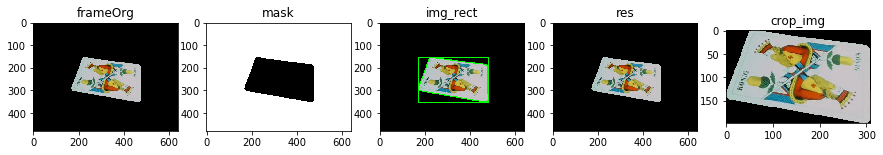

x:170 y:156 width:307 height:197


In [2]:
import matplotlib.pyplot as plt 
# load an example image
myImage=cv2.imread(r".\images\02_data_preparation\datascan_ii\A7_000013.jpg",cv2.IMREAD_COLOR)
frameOrg,mask,img_rect,res,crop_img,d=js.analyzeScan(myImage,0.5)       # call anlyzeScan function and save results
titles=["frameOrg","mask","img_rect","res","crop_img"]                  # name the paramters to display it on charts
visualCheck= True                                                       # switch to show or not visualization
if visualCheck:                                                         # check
    data=js.analyzeScan(frameOrg)                                       # do it again .. was copied from frontend juypter notebook
    display(HTML("<h3>analyzeImage result check</h3>"))                      # write title
    fig=plt.figure(figsize=(15,15))                                     # prepare figure size
    i=col=1                                                             # initialize variables
    for item in data[0:-1]:                                             # iterate only image parameters
        temp=cv2.cvtColor(item,cv2.COLOR_BGR2RGB)                       # justify cv color channels
        fig.add_subplot(1, 5, i)                                        # add sublot on index i
        plt.title(titles[i-1])                                          # set title
        plt.imshow(temp)                                                # show parameter within chart
        i=i+1                                                           # increase index
    plt.show()                                                          # show chart
print(f"x:{d[0]} y:{d[1]} width:{d[2]} height:{d[3]}")                  # explain integer parameters
